This colab processes our data, and runs the ML algorithms

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('Dropout_Academic Success - Sheet1.csv')
# replace spaces and special characters in column names with underscores
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace("'", '')

# Change cell values to the variable descriptions

marital_keys = {
    1: "single",
    2: "married",
    3: "widower",
    4: "divorced",
    5: "facto union",
    6: "legally separate"}

application_mode_keys = {
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International"}

course_keys = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance"}

daytime_evening_attendance_keys = {1: 'daytime', 0: 'evening'}

previous_qualification_keys = {

    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "2th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"}

nacionality_keys = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Other",
    108: "Other",
    109: "Other"}

parent_qualification_keys = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle"}

parent_occupation_keys = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors,  Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and  related techniques",
    122: "Health professionals",
    123: "teachers",
    124: "Specialists in finance, accounting, administrative organization, public  and commercial relations",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and  similar services",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and  similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related  operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production  workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers,  subsistence",
    171: "Skilled construction workers and the like, except electricians",
    173: "Skilled workers in printing, precision instrument manufacturing,  jewelers, artisans and the like",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries  and crafts",
    181: "Fixed plant and machine operators",
    182: "assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    191: "cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and  forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing  and transport",
    194: "Meal preparation assistant",
    195: "Street vendors (except food) and street service provider"}

yes_no_keys = {0: "no", 1: "yes"}
male_female_keys = {0: "Female", 1: "Male"}
columns = ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification',
           'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Fathers_occupation', 'Mothers_occupation'
           ]


column_dicts = [marital_keys, application_mode_keys, course_keys, daytime_evening_attendance_keys,
                previous_qualification_keys, nacionality_keys, parent_qualification_keys, parent_qualification_keys,
                parent_occupation_keys, parent_occupation_keys, yes_no_keys, yes_no_keys, yes_no_keys, yes_no_keys,
                male_female_keys, yes_no_keys]

droplist = ["Curricular_units_1st_sem_(credited)", "Curricular_units_1st_sem_(enrolled)",
            "Curricular_units_1st_sem_(evaluations)", "Curricular_units_1st_sem_(approved)",
            "Curricular_units_1st_sem_(grade)", "Curricular_units_1st_sem_(without_evaluations)",
            "Curricular_units_2nd_sem_(credited)", "Curricular_units_2nd_sem_(enrolled)",
            "Curricular_units_2nd_sem_(evaluations)", "Curricular_units_2nd_sem_(approved)",
            "Curricular_units_2nd_sem_(grade)", "Curricular_units_2nd_sem_(without_evaluations)"]

# For each value in DataFrame
for name, values in df.iteritems():
    # If column requires deleting
    if name in droplist:
        df = df.drop(name, axis=1)
    v = -1
    # If column requires changing
    if name in columns:
        # For each value
        for value in values:
            v += 1
            # Get index of name in list
            c_index = columns.index(name)
            # Cell is set to corresponding value in dictionary
            df[name].loc[df.index[v]] = column_dicts[c_index][value]

# Show first rows
print(df.info())
print(df)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital_status                  4424 non-null   object 
 1   Application_mode                4424 non-null   object 
 2   Application_order               4424 non-null   int64  
 3   Course                          4424 non-null   object 
 4   Daytime_evening_attendance      4424 non-null   object 
 5   Previous_qualification          4424 non-null   object 
 6   Previous_qualification_(grade)  4424 non-null   float64
 7   Nacionality                     4424 non-null   object 
 8   Mothers_qualification           4424 non-null   object 
 9   Fathers_qualification           4424 non-null   object 
 10  Mothers_occupation              4424 non-null   object 
 11  Fathers_occupation              4424 non-null   object 
 12  Admission_grade                 44

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_df = df.copy()
# Label encoding normalises labels into numbers, maintaining column name
encoders = {}
for col in l_df.columns:
 # If column in list of categorical columns
 if col in columns or col == 'Target' :
   # Encode by label
   le = LabelEncoder().fit(df[col])
   l_df[col] = le.transform(df[col])
   encoders[col] = le

print (l_df['Marital_status'])

0       4
1       4
2       4
3       4
4       3
       ..
4419    4
4420    4
4421    4
4422    4
4423    4
Name: Marital_status, Length: 4424, dtype: int64


Heat map

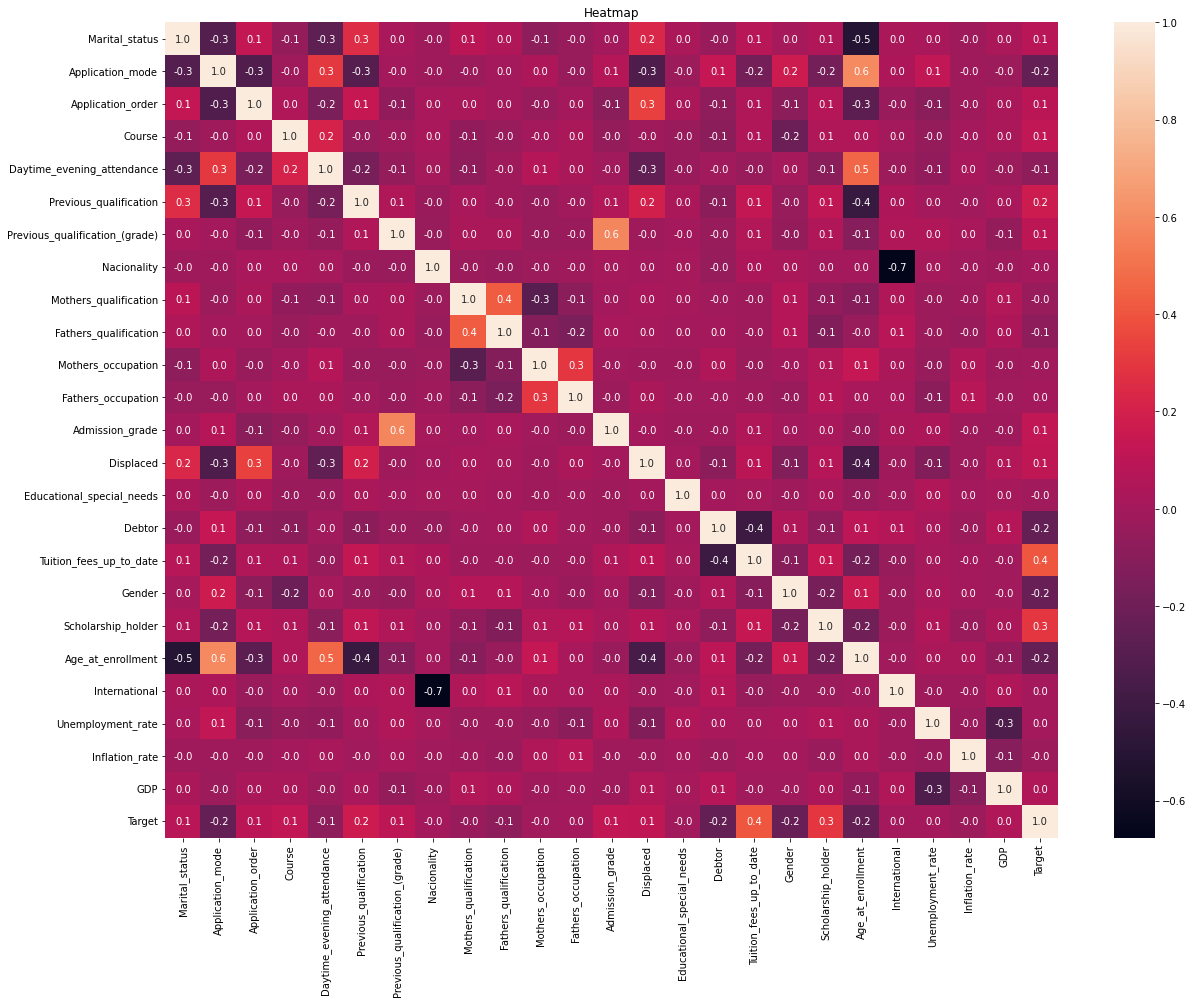

In [ ]:
correlations = l_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlations, annot=True, fmt='.1f').set(title='Heatmap');

One-hot

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

df_hot = df

# One-Hot encode data column by column
for column in columns:

    column_transformer = make_column_transformer(\
                      (OneHotEncoder(), [column]),remainder='passthrough')
    
    df_hot = column_transformer.fit_transform(df_hot)
    df_hot = pd.DataFrame(data=df_hot, \
                          columns=column_transformer.get_feature_names_out())
    df_hot.columns = df_hot.columns.str.lstrip("mainder__")
    df_hot.columns = df_hot.columns.str.lstrip("onehotencoder__")

for columns in df_hot.columns:
    print(columns)


Mothers_occupation_(blank)
Mothers_occupation_Administrative staff
Mothers_occupation_Armed Forces Professions
Mothers_occupation_Data, accounting, statistical, financial services and registry-related  operators
Mothers_occupation_Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
Mothers_occupation_Health professionals
Mothers_occupation_Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers
Mothers_occupation_Intermediate Level Technicians and Professions
Mothers_occupation_Intermediate level science and engineering technicians and professions
Mothers_occupation_Intermediate level technicians from legal, social, sports, cultural and  similar services
Mothers_occupation_Meal preparation assistant
Mothers_occupation_Office workers, secretaries in general and data processing operators
Mothers_occupation_Other Situation
Mothers_occupation_Other administrative support staff
Mothers_occupation_Personal Services, Security and Safety Workers and Sellers

Random forest feature selection

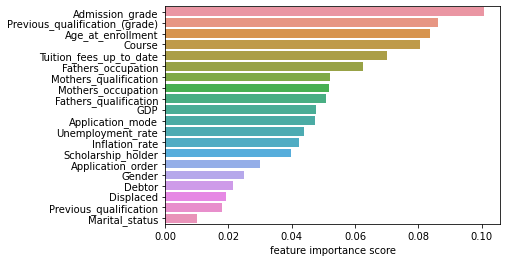

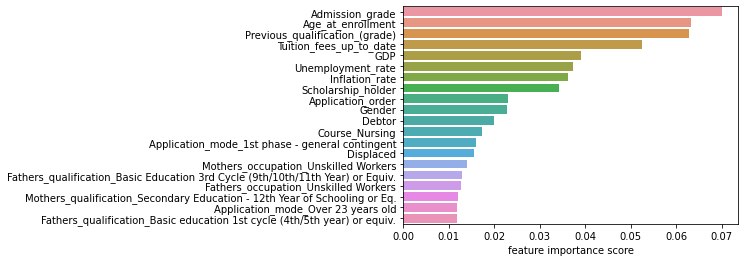

In [ ]:
# Dimension reductions 
#We do this by running a random forest, and then we rank them by importance and remove the 
# least important features from the actual random forest define data and split training and testing sets 


# hyperparameters include the number of decision trees in the forest and the 
#   number of features considered by each tree when splitting a node

l_df_top = pd.DataFrame()
df_hot_top = pd.DataFrame()
sample_list = [[l_df, l_df_top], [df_hot, df_hot_top]]
#sample_list = [[l_df, l_df_top]]
for sample in sample_list:
  y = sample[0]['Target']
  X = sample[0].drop(['Target'], axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
  # select model
  rfc = RandomForestClassifier(n_estimators=500, random_state=0)

  # fit data
  rfc.fit(X_train, y_train)
  # create the feature score list
  feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
  feature_scores.head(20)
  # Save the top important features into a separate dataset
  top_features = []
  for i in range(0, 20):
      top_features.append(list(feature_scores.index.values)[i])

  sample[1]['Target'] = sample[0]['Target']

  for column in top_features:
      sample[1][column] = sample[0][column]

  sample[1].head()

  feature_scores = feature_scores.head(20)
  sns.barplot(x=feature_scores, y=feature_scores.index)
  plt.xlabel('feature importance score')
  plt.show()


PCA reduction

In [ ]:
def PCA_Reduction(df):
  # dimensionality reduction
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import MinMaxScaler

  pca = PCA(n_components=0.9)
  p = df
  p = p.drop(['Target'], axis=1)

  # Standardise and normalise the data
  p = (p - p.mean()) / p.std()

  scaler = MinMaxScaler()
  data_rescaled = scaler.fit_transform(p)

  components = pca.fit_transform(data_rescaled)
  p = pd.DataFrame(pca.transform(data_rescaled))
  p['Target']=df['Target']
  plt.plot(pca.explained_variance_ratio_)
  plt.ylabel('Explained Variance')
  plt.xlabel('Components')
  plt.show()
  
  return p


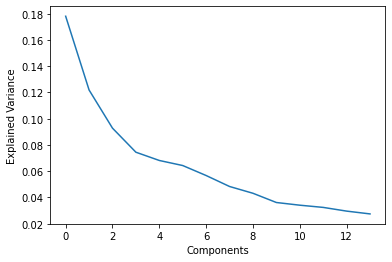

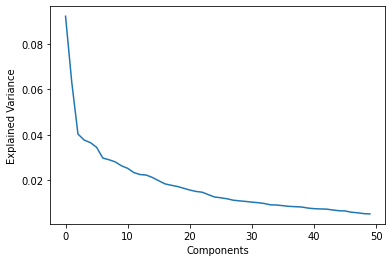

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,-0.369900,-0.026736,-0.494131,-0.719192,0.784974,0.404695,0.602083,-0.523249,0.243667,0.357269,...,0.330876,0.158545,-0.654943,-0.225796,-0.273327,-0.000458,-0.056302,-0.072259,0.007978,Dropout
1,-0.469825,0.834251,0.395664,-0.604693,0.084703,0.390896,0.064712,-0.278356,-0.116703,-0.290260,...,-0.015097,0.218032,0.040230,-0.119981,0.156183,-0.053766,-0.069751,-0.028228,-0.046772,Graduate
2,0.549414,-1.103911,0.942891,-0.667837,0.100432,0.671159,0.110506,-0.489628,-0.385094,-0.086916,...,-0.210822,0.440102,0.541051,-0.151735,-0.258574,0.208203,0.052844,0.066254,-0.004577,Dropout
3,-0.247262,-0.158779,-1.093597,-0.678078,-0.428276,0.523223,-0.012410,-0.265307,0.030954,-0.015355,...,0.131289,-0.075926,0.083568,0.258687,-0.142541,-0.162904,-0.025472,0.010738,-0.107093,Graduate
4,2.004306,-0.195955,0.035757,0.523021,-0.237588,-0.499932,0.533459,0.255425,1.003393,-0.507942,...,-0.059782,0.720238,-0.070590,0.190666,0.107254,-0.159150,-0.123001,-0.006227,0.089224,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.637679,0.738241,0.954474,0.060630,-0.294745,-0.077275,-0.476544,-0.526850,0.387263,0.720974,...,-0.102279,0.005320,0.045693,0.074368,0.008151,0.004463,0.036278,-0.152615,0.003901,Graduate
4420,-0.466578,-0.453764,1.309896,-0.555173,-0.139608,-0.359130,0.664530,0.408784,0.245877,-0.101246,...,0.502847,0.071205,0.424411,-0.003029,-0.068198,0.132466,0.172539,0.051497,-0.147914,Dropout
4421,0.267401,-1.749667,0.409044,-0.178317,-0.545126,-0.114288,-0.192010,0.194268,-0.431514,0.286724,...,-0.022530,0.072780,-0.032418,-0.241820,0.102052,0.046403,-0.063429,0.077748,0.058848,Dropout
4422,-0.076877,-0.891271,-0.130213,0.104707,-0.866067,0.330407,-0.469965,-0.293224,-0.528658,0.149032,...,0.174368,-0.062252,0.043012,-0.035459,-0.032155,-0.164771,0.062870,-0.098832,-0.152621,Graduate


In [ ]:
PCA_Reduction(l_df)
PCA_Reduction(df_hot)


In [ ]:
def plot_matrix (y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)

  font_size = 14
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.imshow(cm)
  ax.grid(False)
  ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
  ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
  ax.xaxis.set(ticks=range(10))
  ax.yaxis.set(ticks=range(2))
  ax.set_ylim(9.5, -0.5)
  for i in range(2):
      for j in range(2):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
  plt.show()   

Main result output

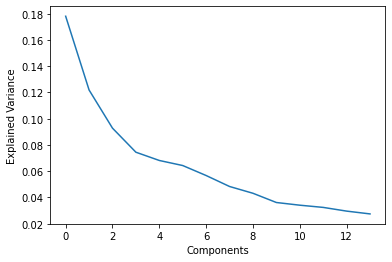

KNN Label encoding PCA reduction
              precision    recall  f1-score   support

           0       0.67      0.53      0.59       361
           1       0.00      0.00      0.00       217
           2       0.58      0.91      0.71       528

    accuracy                           0.60      1106
   macro avg       0.42      0.48      0.43      1106
weighted avg       0.50      0.60      0.53      1106

\begin{table}
\centering
\caption{KNN}
\label{test_table}
\begin{tabular}{lccc}
\toprule
{} & precision & recall & f1-score \\
\midrule
Dropout    &      0.67 &   0.53 &     0.59 \\
Enrolled   &       0.0 &    0.0 &      0.0 \\
Graduate   &      0.58 &   0.91 &     0.71 \\
           &           &        &          \\
Accuracy:  &       0.6 &        &          \\
\bottomrule
\end{tabular}
\end{table}



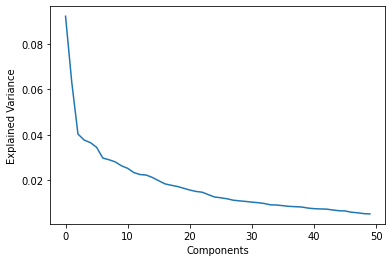

Random forest One-hot Full sample
              precision    recall  f1-score   support

     Dropout       0.65      0.65      0.65       361
    Enrolled       0.50      0.05      0.09       217
    Graduate       0.63      0.87      0.73       528

    accuracy                           0.64      1106
   macro avg       0.59      0.52      0.49      1106
weighted avg       0.61      0.64      0.58      1106

\begin{table}
\centering
\caption{Random forest}
\label{test_table}
\begin{tabular}{lccc}
\toprule
{} & precision & recall & f1-score \\
\midrule
Dropout    &      0.65 &   0.65 &     0.65 \\
Enrolled   &       0.5 &   0.05 &     0.09 \\
Graduate   &      0.63 &   0.87 &     0.73 \\
           &           &        &          \\
Accuracy:  &      0.64 &        &          \\
\bottomrule
\end{tabular}
\end{table}

Logistic regression One-hot Full sample
              precision    recall  f1-score   support

     Dropout       0.66      0.65      0.66       361
    Enrolled       0.

In [ ]:
from pandas.core.frame import DataFrame
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.append({'precision':'', 'recall':'', 'f1-score':'', 'support': ''}, ignore_index = True)
    df_classification_report.rename(index = {0:"Dropout", 1:'Enrolled', 2: "Graduate", 3:'Accuracy: ', 6:''},inplace = True)
    df_classification_report = df_classification_report.append({'precision':'', 'recall':'', 'f1-score':'', 'support': ''}, ignore_index = True)
    df_classification_report.rename(index = {0:"Dropout", 1:'Enrolled', 2: "Graduate", 3:'Accuracy: ', 6:''},inplace = True)
    return df_classification_report

# Full sample predictions

table_label_encoding = DataFrame()
table_one_hot = DataFrame()
sample_list = [[l_df, 'Label encoding', table_label_encoding, l_df_top], [df_hot, 'One-hot', table_one_hot, df_hot_top]]


# Define models
rfc = RandomForestClassifier(n_estimators=500, random_state=0)
logreg = LogisticRegression(max_iter=10000)
KNN_model = KNeighborsClassifier(n_neighbors=100)
SVC_model = SVC(kernel='linear', C=1)


# Iterate over encoding methods
for sample in sample_list:
  
  # Encode samples
  dflist = [[sample[0], 'Full sample'], [PCA_Reduction(sample[0]), 'PCA reduction'], [sample[3], 'Random forest top-20']]
  
  # Iterate over encoded dataframes
  for dataframe in dflist:

      y = dataframe[0]['Target']
      X = dataframe[0].drop(['Target'], axis=1)
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

      # Fit data to algorithms
      rfc.fit(X_train, y_train)
      logreg.fit(X_train, y_train)
      KNN_model.fit(X_train, y_train)
      SVC_model.fit(X_train, y_train)

      # Predict test sample
      rfc_pred = rfc.predict(X_test)
      logreg_pred = logreg.predict(X_test)
      KNN_pred = KNN_model.predict(X_test)
      SVC_pred = SVC_model.predict(X_test)


      # Table creation
      # If One-hot using full sample, or if label encoded and using PCA reduction
      if (sample[1]=='One-hot' and dataframe[1] =='Full sample') or \
         (sample[1]=='Label encoding' and dataframe[1] =='PCA reduction'):
         
          methods = [[KNN_pred, "KNN"]] if sample[1]=='Label encoding' else [[rfc_pred, 'Random forest'], [logreg_pred, 'Logistic regression'], [SVC_pred, 'SVM']]
          
          # Output table
          # For each ML algorithm
          for method in methods:

              print(method[1], sample[1], dataframe[1])
              print(classification_report(y_test, method[0]))
              
              report = get_classification_report(y_test, method[0])
              report_mod = report.head(0)

              for row in ['Dropout', 'Enrolled', 'Graduate', '', 'Accuracy: ']:
                report_mod = report_mod.append(report.loc[row])

              for column in ['precision', 'recall', 'f1-score']:
                for row in ['Dropout', 'Enrolled', 'Graduate', 'Accuracy: ']:
                    report_mod.loc[row][column] = round(report_mod.loc[row][column], 2)

              for column in ['recall', 'f1-score']:
                report_mod.loc['Accuracy: '][column] = ''

              report_mod = report_mod.drop(['support'], axis=1)
              print(report_mod.to_latex(caption=method[1], escape=False, column_format='lccc', label=('test_table')))

      sample[2][dataframe[1]] = [round(accuracy_score(y_test, rfc_pred), 3), \
                                 round(accuracy_score(y_test, logreg_pred), 3),\
                                 round(accuracy_score(y_test, KNN_pred), 3),\
                                 round(accuracy_score(y_test, SVC_pred), 3)]

      sample[2].rename(index = {0: "Random forest",
                                1:"Logistic regression", 2:'KNN', 3:'SVC'},
                                inplace = True)


#Create latex table
table_2 = pd.DataFrame({'Full sample':[''],  'PCA reduction':[''], 'Random forest top-20':['']})
merged_table_1 = table_2.append(table_label_encoding)
merged_table_1.rename(index = {0: "\textbf{Label encoding}"},inplace = True)
merged_table_1 = merged_table_1.append(table_2)
merged_table = merged_table_1.append(table_one_hot)
merged_table.rename(index = {0: "\textbf{One-hot}"},inplace = True)
print(merged_table.to_latex(caption='Encoding', escape=False))




Classification report for latex testing

In [ ]:
#Make a classification report

print(classification_report(y_test, rfc_pred))

def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.append({'precision':'', 'recall':'', 'f1-score':'', 'support': ''}, ignore_index = True)
    df_classification_report.rename(index = {0:"Dropout", 1:'Enrolled', 2: "Graduate", 3:'Accuracy: ', 6:''},inplace = True)
    return df_classification_report

report = get_classification_report(y_test, rfc_pred)
report = report.append({'precision':'', 'recall':'', 'f1-score':'', 'support': ''}, ignore_index = True)
report.rename(index = {0:"Dropout", 1:'Enrolled', 2: "Graduate", 3:'Accuracy: ', 6:''},inplace = True)

report_mod = report.head(0)
for row in ['Dropout', 'Enrolled', 'Graduate', '', 'Accuracy: ']:
  report_mod = report_mod.append(report.loc[row])
for column in ['precision', 'recall', 'f1-score']:
  for row in ['Dropout', 'Enrolled', 'Graduate', 'Accuracy: ']:
      report_mod.loc[row][column] = round(report_mod.loc[row][column], 2)
for column in ['recall', 'f1-score']:
  report_mod.loc['Accuracy: '][column] = ''
report_mod = report_mod.drop(['support'], axis=1)

#print(report_mod.to_latex(caption='test table', escape=False, column_format='lccc', label=('test_table')))
report_mod

              precision    recall  f1-score   support

     Dropout       0.62      0.62      0.62       361
    Enrolled       0.27      0.06      0.10       217
    Graduate       0.62      0.81      0.70       528

    accuracy                           0.60      1106
   macro avg       0.50      0.50      0.48      1106
weighted avg       0.55      0.60      0.56      1106



,precision,recall,f1-score
Dropout,0.62,0.62,0.62
Enrolled,0.27,0.06,0.1
Graduate,0.62,0.81,0.7
,,,
Accuracy:,0.6,,


In [ ]:
#Make a classification report

print(classification_report(y_test, rfc_pred))

def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.append({'precision':'', 'recall':'', 'f1-score':'', 'support': ''}, ignore_index = True)
    df_classification_report.rename(index = {0:"Dropout", 1:'Enrolled', 2: "Graduate", 3:'Accuracy: ', 6:''},inplace = True)
    df_classification_report = df_classification_report.append({'precision':'', 'recall':'', 'f1-score':'', 'support': ''}, ignore_index = True)
    df_classification_report.rename(index = {0:"Dropout", 1:'Enrolled', 2: "Graduate", 3:'Accuracy: ', 6:''},inplace = True)
    return df_classification_report

report = get_classification_report(y_test, rfc_pred)
report_mod = report.head(0)
for row in ['Dropout', 'Enrolled', 'Graduate', '', 'Accuracy: ']:
  report_mod = report_mod.append(report.loc[row])
for column in ['precision', 'recall', 'f1-score']:
  for row in ['Dropout', 'Enrolled', 'Graduate', 'Accuracy: ']:
      report_mod.loc[row][column] = round(report_mod.loc[row][column], 2)
for column in ['recall', 'f1-score']:
  report_mod.loc['Accuracy: '][column] = ''
report_mod = report_mod.drop(['support'], axis=1)

print(report_mod.to_latex(caption='test table', escape=False, column_format='lccc', label=('test_table')))
report_mod

              precision    recall  f1-score   support

     Dropout       0.62      0.62      0.62       361
    Enrolled       0.27      0.06      0.10       217
    Graduate       0.62      0.81      0.70       528

    accuracy                           0.60      1106
   macro avg       0.50      0.50      0.48      1106
weighted avg       0.55      0.60      0.56      1106

\begin{table}
\centering
\caption{test table}
\label{test_table}
\begin{tabular}{lccc}
\toprule
{} & precision & recall & f1-score \\
\midrule
Dropout    &      0.62 &   0.62 &     0.62 \\
Enrolled   &      0.27 &   0.06 &      0.1 \\
Graduate   &      0.62 &   0.81 &      0.7 \\
           &           &        &          \\
Accuracy:  &       0.6 &        &          \\
\bottomrule
\end{tabular}
\end{table}



,precision,recall,f1-score
Dropout,0.62,0.62,0.62
Enrolled,0.27,0.06,0.1
Graduate,0.62,0.81,0.7
,,,
Accuracy:,0.6,,


Other tests

In [ ]:
def output_column_names(df):
  # Output column names
  my_list = df.columns.values.tolist()
  my_list

In [ ]:
!pip install category_encoders
# Binary encoding
import category_encoders as ce
def binary_encode(df):
  encoder= ce.BinaryEncoder(cols=[columns],return_df=True)
  df=encoder.fit_transform(df)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.4 MB/s 


In [ ]:
# Count the number of searched item in column target
def count_category(df, target, searched):
  count = 0
  graduates = 0
  for x in df[target]:
    if (x==searched):
      count+=1
  return count

# Return number of items not matching searched
def count_not_category(df, target, searched):
  count = 0
  graduates = 0
  for x in df[target]:
    if (x!=searched):
      count+=1
  return count


Random Forest tweaking

In [ ]:
#random forest tweaking 1
#tweaking the number of trees
y = df_hot['Target']
X = df_hot.drop(['Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

tree_timeline = pd.DataFrame(columns={'number_trees', 'accuracy'})
for number_of_trees in range(1, 500, 1):
  rfc = RandomForestClassifier(n_estimators=number_of_trees, random_state=0)
  rfc.fit(X_train, y_train)
  rfc_pred = rfc.predict(X_test)
  tree_timeline = tree_timeline.append({'number_trees':number_of_trees, 'accuracy':accuracy_score(y_test, rfc_pred)}, ignore_index = True)
  print(number_of_trees)
tree_timeline

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


KeyboardInterrupt: ignored

In [ ]:
#random forest tweaking 2

number_of_trees = 385

criteria_table = pd.DataFrame(columns={'method', 'accuracy'})
for criteria in ['gini', 'entropy']:
  rfc = RandomForestClassifier(n_estimators=number_of_trees, random_state=0, criterion=criteria)
  rfc.fit(X_train, y_train)
  rfc_pred = rfc.predict(X_test)
  criteria_table = criteria_table.append({'method':criteria, 'accuracy':accuracy_score(y_test, rfc_pred)}, ignore_index = True)
criteria_table

print(criteria_table.to_latex(caption = 'criteria settings'))

In [ ]:
#random forest tweaking 3
#tweaking the maximum depth
number_of_trees = 385
y = df_hot['Target']
X = df_hot.drop(['Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

depth_table = pd.DataFrame(columns={'maximum depth', 'accuracy'})
for depth in range(1, 500, 1):
  rfc = RandomForestClassifier(n_estimators=number_of_trees, random_state=0, max_depth=depth)
  rfc.fit(X_train, y_train)
  rfc_pred = rfc.predict(X_test)
  depth_table = depth_table.append({'maximum depth':depth, 'accuracy':accuracy_score(y_test, rfc_pred)}, ignore_index = True)
  print(depth)
depth_table

depth_table_limited = depth_table.head(60)
sns.lineplot(data = depth_table_limited, x='maximum depth', y='accuracy')
depth_table_limited.loc[depth_table_limited['accuracy'].idxmax()]